# Assessing the Impact of Daylight Savings Time on Driving Fatalities

- Anastasiades, Andrew
- Drozdzewicz, Peter
- Garcia, Viera
- Sperry, Taylor
- Surapanemi, Sindhura

### DEPENDENCIES

In [1]:
import pandas as pd #data manipulation
import os #Interoperability
import matplotlib.pyplot as plt
import scipy.stats as st
import numpy as np
import datetime as dt

### FILE PATHS

In [2]:
accident_csv = os.path.join("Resources", "accident.csv")

### LOAD DATAFRAME

In [3]:
raw_df = pd.read_csv(accident_csv)
raw_df.columns

/opt/anaconda3/envs/PythonData/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3072: DtypeWarning: Columns (40,42,69) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Index(['STATE', 'STATENAME', 'ST_CASE', 'VE_TOTAL', 'VE_FORMS', 'PVH_INVL',
       'PEDS', 'PERSONS', 'PERMVIT', 'PERNOTMVIT', 'COUNTY', 'COUNTYNAME',
       'CITY', 'CITYNAME', 'DAY', 'DAYNAME', 'MONTH', 'MONTHNAME', 'YEAR',
       'DAY_WEEK', 'DAY_WEEKNAME', 'HOUR', 'HOURNAME', 'MINUTE', 'MINUTENAME',
       'NHS', 'NHSNAME', 'ROUTE', 'ROUTENAME', 'TWAY_ID', 'TWAY_ID2',
       'RUR_URB', 'RUR_URBNAME', 'FUNC_SYS', 'FUNC_SYSNAME', 'RD_OWNER',
       'RD_OWNERNAME', 'MILEPT', 'MILEPTNAME', 'LATITUDE', 'LATITUDENAME',
       'LONGITUD', 'LONGITUDNAME', 'SP_JUR', 'SP_JURNAME', 'HARM_EV',
       'HARM_EVNAME', 'MAN_COLL', 'MAN_COLLNAME', 'RELJCT1', 'RELJCT1NAME',
       'RELJCT2', 'RELJCT2NAME', 'TYP_INT', 'TYP_INTNAME', 'WRK_ZONE',
       'WRK_ZONENAME', 'REL_ROAD', 'REL_ROADNAME', 'LGT_COND', 'LGT_CONDNAME',
       'WEATHER1', 'WEATHER1NAME', 'WEATHER2', 'WEATHER2NAME', 'WEATHER',
       'WEATHERNAME', 'SCH_BUS', 'SCH_BUSNAME', 'RAIL', 'RAILNAME', 'NOT_HOUR',
       'NOT_HOURNAME', 'NOT

In [4]:
columns_to_keep = ['STATENAME', 'DAY', 'MONTH','YEAR','HOUR','DAY_WEEK','DAY_WEEKNAME', 'LGT_CONDNAME',
                   'DRUNK_DR', 'WEATHERNAME', 'RUR_URBNAME', 'FATALS',]
df = pd.read_csv(accident_csv, usecols=columns_to_keep)

### CLEAN DATAFRAME

In [5]:
# EXCLUDE DRUNK DRIVERS
df = df[df["DRUNK_DR"]==0] 
df.drop(axis=1, labels=["DRUNK_DR"], inplace=True)

In [6]:
# ADD DATE AND WEEKNUM
df["DATE"] = pd.to_datetime(df[["YEAR", "MONTH", "DAY"]])
#df["WEEK_NUM"] = df["DATE"].dt.week
df['WEEK_NUM'] = df['DATE'].apply(lambda x: (x + dt.timedelta(days=1)).week)

In [7]:
# SPLIT SAMPLE AND CONTROL
control_states = ["Arizona", "Hawaii"] #These states do not observe DLS
control_df = df[df.loc[:,'STATENAME'].isin(control_states)] #NO DLS
sample_df = df[~df.loc[:,'STATENAME'].isin(control_states)] #

In [8]:
sample_df

,STATENAME,DAY,MONTH,YEAR,DAY_WEEK,DAY_WEEKNAME,HOUR,RUR_URBNAME,LGT_CONDNAME,WEATHERNAME,FATALS,DATE,WEEK_NUM
1,Alabama,23,1,2019,4,Wednesday,18,Urban,Dark - Not Lighted,Rain,1,2019-01-23,4
2,Alabama,22,1,2019,3,Tuesday,19,Rural,Dark - Not Lighted,Cloudy,1,2019-01-22,4
3,Alabama,22,1,2019,3,Tuesday,3,Rural,Dark - Not Lighted,Clear,1,2019-01-22,4
5,Alabama,7,1,2019,2,Monday,12,Rural,Daylight,Clear,1,2019-01-07,2
6,Alabama,2,1,2019,4,Wednesday,9,Rural,Daylight,Cloudy,1,2019-01-02,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
33236,Wyoming,4,10,2019,6,Friday,15,Rural,Daylight,Clear,1,2019-10-04,40
33237,Wyoming,3,10,2019,5,Thursday,14,Rural,Daylight,Clear,1,2019-10-03,40
33238,Wyoming,27,10,2019,1,Sunday,3,Rural,Dark - Not Lighted,Snow,1,2019-10-27,44
33239,Wyoming,28,9,2019,7,Saturday,18,Rural,Dusk,Severe Crosswinds,1,2019-09-28,39


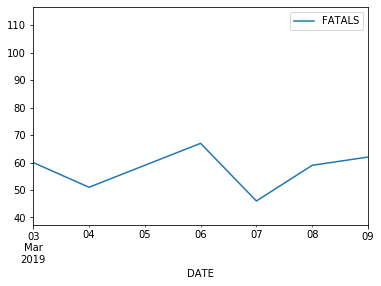

In [9]:
start_date = '2019-03-03'
end_date = '2019-03-09'

sample_gb = sample_df.groupby("DATE")
summary = pd.DataFrame(sample_gb["FATALS"].sum())
summary.reset_index(inplace=True)
summary.plot(x="DATE", y="FATALS", kind="line")
plt.xlim(start_date, end_date)
plt.show()

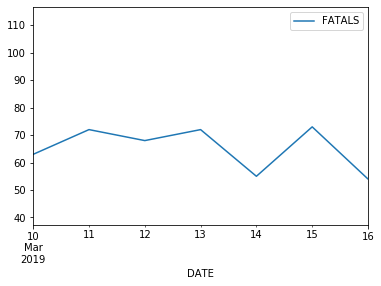

In [10]:
start_date = '2019-03-10'
end_date = '2019-03-16'
summary.plot(x="DATE", y="FATALS", kind="line")
plt.xlim(start_date, end_date)
plt.show()

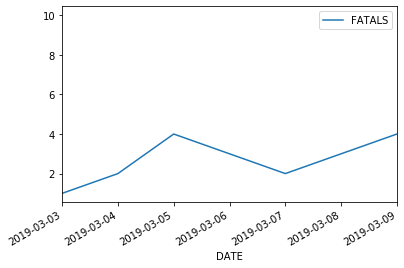

In [11]:
start_date = '2019-03-03'
end_date = '2019-03-09'

sample_gb = control_df.groupby("DATE")
summary = pd.DataFrame(sample_gb["FATALS"].sum())
summary.reset_index(inplace=True)
summary.plot(x="DATE", y="FATALS", kind="line")
plt.xlim(start_date, end_date)
plt.show()

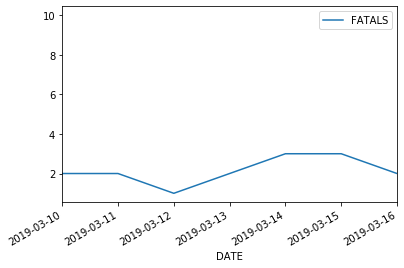

In [12]:
start_date = pd.to_datetime('2019-03-10')
end_date = pd.to_datetime('2019-03-16')

sample_gb = control_df.groupby("DATE")
summary = pd.DataFrame(sample_gb["FATALS"].sum())
summary.reset_index(inplace=True)
summary.plot(x="DATE", y="FATALS", kind="line")
plt.xlim(start_date, end_date)
plt.show()

### REVIEW WEEK-OVER-WEEK CHANGE IN FATALITIES

/opt/anaconda3/envs/PythonData/lib/python3.6/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/opt/anaconda3/envs/PythonData/lib/python3.6/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


(array([1.12810062, 2.25620123, 2.82025154, 5.07645277, 6.20455339,
        5.07645277, 1.69215092, 2.25620123, 0.56405031, 1.69215092]),
 array([-0.1614786 , -0.12671602, -0.09195344, -0.05719086, -0.02242829,
         0.01233429,  0.04709687,  0.08185945,  0.11662203,  0.15138461,
         0.18614719]),
 <a list of 10 Patch objects>)

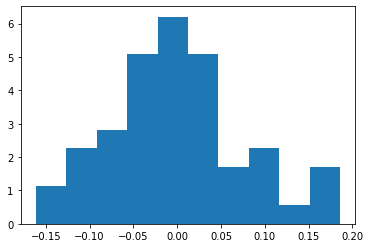

In [13]:
week_gb = sample_df.groupby(by=["WEEK_NUM"])
week_summary = pd.DataFrame(week_gb["FATALS"].sum())
#week_summary["WEEKLY_CHANGE"]
weekly_change = []
for index, row in week_summary.iterrows(): # WE WANT DELTA! FOR EACH WEEK
    if index==1:
        weekly_change.append(np.nan)
    else:
        this_num = week_summary.loc[index, "FATALS"] # FATALITIES FROM THIS WEEK
        last_num = week_summary.loc[index-1, "FATALS"] # FATALITIES FROM LAST WEEK
        delta = (this_num / last_num) - 1
        weekly_change.append(delta)
week_summary["WEEKLY_CHANGE"] = weekly_change
week_summary["Z_SCORE"] = st.zscore(weekly_change, nan_policy='omit')
plt.hist(week_summary["WEEKLY_CHANGE"], density=True)


In [18]:
start_date.week # <- this is going to be off!


10

In [15]:
week_summary

,FATALS,WEEKLY_CHANGE,Z_SCORE
WEEK_NUM,,,
1,553,NaN,NaN
2,514,-0.070524,-0.946536
3,431,-0.161479,-2.159611
4,386,-0.104408,-1.398453
5,403,0.044041,0.581452
6,475,0.178660,2.376888
7,424,-0.107368,-1.437932
8,414,-0.023585,-0.320494
9,396,-0.043478,-0.585816


In [19]:
sample_df[sample_df["WEEK_NUM"]==11].sort_values(by="DATE")

,STATENAME,DAY,MONTH,YEAR,DAY_WEEK,DAY_WEEKNAME,HOUR,RUR_URBNAME,LGT_CONDNAME,WEATHERNAME,FATALS,DATE,WEEK_NUM
116,Alabama,10,3,2019,1,Sunday,14,Urban,Daylight,Clear,1,2019-03-10,11
9730,Georgia,10,3,2019,1,Sunday,15,Urban,Daylight,Clear,1,2019-03-10,11
28034,Texas,10,3,2019,1,Sunday,20,Urban,Dark - Not Lighted,Cloudy,1,2019-03-10,11
9729,Georgia,10,3,2019,1,Sunday,3,Urban,Dark - Lighted,Clear,1,2019-03-10,11
28021,Texas,10,3,2019,1,Sunday,14,Rural,Daylight,Cloudy,1,2019-03-10,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...
26644,Tennessee,16,3,2019,7,Saturday,18,Urban,Daylight,Clear,1,2019-03-16,11
13623,Kentucky,16,3,2019,7,Saturday,10,Rural,Daylight,Clear,1,2019-03-16,11
28211,Texas,16,3,2019,7,Saturday,17,Urban,Daylight,Clear,1,2019-03-16,11
9746,Georgia,16,3,2019,7,Saturday,17,Urban,Daylight,Clear,2,2019-03-16,11
